## <center>Association Rules Assignment(Movies)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots .</code>


In [1]:
#!pip install mlxtend

In [2]:
#Importing the necessary libraries for the model
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the csv file and having a glance at the data
movie_data = pd.read_csv('my_movies.csv')
movie_data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


#### Making necessary EDA for the model

In [4]:
#Checking the rows and columns of the data
movie_data.shape

(10, 15)

In [5]:
#Checking for the datatypes and null values if present any
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [6]:
#Considering the encoded data
movies_data1=movie_data.iloc[:,5:16]

### Building the Associaton Rules

#### Model1:Support=0.1

In [7]:
#Building the apriori algorithm with the support of 0.1
movies1 = apriori(movies_data1, min_support=0.1, use_colnames=True)
movies1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [8]:
#Building the association rule with the lift as the metric and min threshold of 0.8
Assoc_rules1 = association_rules(movies1, metric="lift", min_threshold=0.8)
Assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR1),"(LOTR2, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [9]:
#Sorting the Association rules in ascending order wrt to lift 
Assoc_rules1.sort_values('lift',ascending = False,inplace=True)
Assoc_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
226,"(LOTR2, Green Mile, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
221,"(Green Mile, LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
104,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
105,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
181,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
8,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96


In [10]:
#Checking the associated movies for Harry Potter1
moviename='Harry Potter1'
rules1_HarryPotter =(Assoc_rules1.lift>1) & (Assoc_rules1['antecedents'].astype(str).str.contains(moviename))
Assoc_rules1.loc[rules1_HarryPotter,["antecedents","consequents","lift"]]

,antecedents,consequents,lift
221,"(Green Mile, LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",10.000000
153,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",10.000000
222,"(LOTR2, Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
150,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
165,"(Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
...,...,...,...
78,"(Green Mile, Harry Potter1)",(Sixth Sense),1.666667
72,"(LOTR2, Harry Potter1)",(Sixth Sense),1.666667
54,"(Harry Potter1, LOTR1)",(Sixth Sense),1.666667
160,"(Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),1.666667


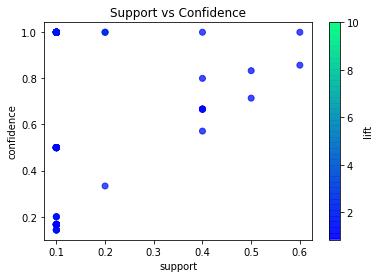

In [11]:
#Visualizing the Support Vs Confidence with lift metric
plt.scatter(Assoc_rules1['support'], Assoc_rules1['confidence'],c=Assoc_rules1['lift'],cmap= 'winter',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

#### Model2:Support=0.2

In [12]:
#Building the apriori algorithm with the support of 0.2
movies2 = apriori(movies_data1, min_support=0.2, use_colnames=True)
movies2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [13]:
#Building the association rule with the lift as the metric and min threshold of 0.8
Assoc_rules2 = association_rules(movies1, metric="lift", min_threshold=0.8)
Assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR1),"(LOTR2, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [14]:
#Sorting the Association rules in ascending order wrt to lift 
Assoc_rules2.sort_values('lift',ascending = False,inplace=True)
Assoc_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
226,"(LOTR2, Green Mile, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
221,"(Green Mile, LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
104,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
105,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
181,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
8,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96


In [15]:
#Checking the associated movies for Harry Potter1
moviename='Harry Potter1'
rules2_HarryPotter =(Assoc_rules2.lift>1) & (Assoc_rules2['antecedents'].astype(str).str.contains(moviename))
Assoc_rules2.loc[rules2_HarryPotter,["antecedents","consequents","lift"]]

,antecedents,consequents,lift
221,"(Green Mile, LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",10.000000
153,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",10.000000
222,"(LOTR2, Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
150,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
165,"(Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
...,...,...,...
78,"(Green Mile, Harry Potter1)",(Sixth Sense),1.666667
72,"(LOTR2, Harry Potter1)",(Sixth Sense),1.666667
54,"(Harry Potter1, LOTR1)",(Sixth Sense),1.666667
160,"(Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),1.666667


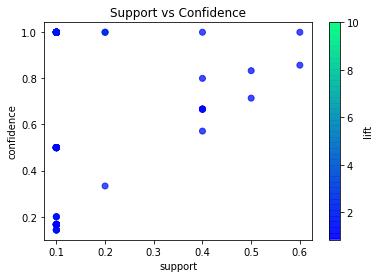

In [16]:
#Visualizing the Support Vs Confidence with lift metric
plt.scatter(Assoc_rules2['support'], Assoc_rules2['confidence'],c=Assoc_rules2['lift'],cmap= 'winter',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

#### Model3:Support=0.05

In [17]:
#Building the apriori algorithm with the support of 0.05
movies3 = apriori(movies_data1, min_support=0.05, use_colnames=True)
movies3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [18]:
#Building the association rule with the lift as the metric and min threshold of 0.8
Assoc_rules3 = association_rules(movies1, metric="lift", min_threshold=0.8)
Assoc_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
241,(Green Mile),"(LOTR2, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
242,(Harry Potter1),"(LOTR2, Green Mile, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
243,(LOTR1),"(LOTR2, Green Mile, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
244,(LOTR2),"(Green Mile, LOTR1, Harry Potter1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [19]:
#Sorting the Association rules in ascending order wrt to lift
Assoc_rules3.sort_values('lift',ascending = False,inplace=True)
Assoc_rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
226,"(LOTR2, Green Mile, Sixth Sense)","(Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
221,"(Green Mile, LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
104,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
105,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
181,"(Green Mile, LOTR1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
8,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
5,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96


In [20]:
#Checking the associated movies for Harry Potter1
moviename='Harry Potter1'
rules3_HarryPotter =(Assoc_rules3.lift>1) & (Assoc_rules3['antecedents'].astype(str).str.contains(moviename))
Assoc_rules3.loc[rules3_HarryPotter,["antecedents","consequents","lift"]]

,antecedents,consequents,lift
221,"(Green Mile, LOTR1, Harry Potter1)","(LOTR2, Sixth Sense)",10.000000
153,"(Harry Potter1, LOTR1)","(LOTR2, Sixth Sense)",10.000000
222,"(LOTR2, Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
150,"(LOTR2, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
165,"(Green Mile, Harry Potter1)","(LOTR1, Sixth Sense)",10.000000
...,...,...,...
78,"(Green Mile, Harry Potter1)",(Sixth Sense),1.666667
72,"(LOTR2, Harry Potter1)",(Sixth Sense),1.666667
54,"(Harry Potter1, LOTR1)",(Sixth Sense),1.666667
160,"(Green Mile, LOTR1, Harry Potter1)",(Sixth Sense),1.666667


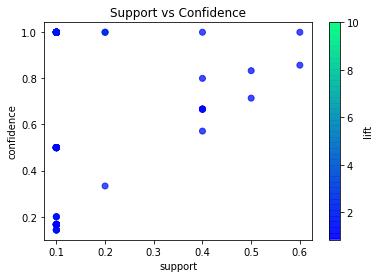

In [21]:
#Visualizing the Support Vs Confidence with lift metric
plt.scatter(Assoc_rules3['support'], Assoc_rules3['confidence'],c=Assoc_rules3['lift'],cmap= 'winter',alpha=0.75)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
cbar=plt.colorbar()
cbar.set_label('lift')
plt.show()

In [22]:
#Looking into the all models lift metric
Table={'Associan rule':pd.Series(['Assoc_Rule1','Assoc_Rule2','Assoc_Rule3']),
               'Lift':[max(Assoc_rules1.lift),max(Assoc_rules2.lift),max(Assoc_rules3.lift)]
               }
Table=pd.DataFrame(Table)
Table

,Associan rule,Lift
0,Assoc_Rule1,10.0
1,Assoc_Rule2,10.0
2,Assoc_Rule3,10.0


#### Insights Drawn:
>From the table Above it depicts that for all the built association rules all the Models that is association rule's lift metric is high and suggests the more associated movies.